<a href="https://colab.research.google.com/github/Bmo411/Deeplearning/blob/main/iteso_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import keras as kr
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train, y_train), (x_test, y_test) = kr.datasets.mnist.load_data(path="mnist.npz")
x_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(10000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000, 28*28)  # Forma: (60000, 784)
x_test = x_test.reshape(10000, 28*28)    # Forma: (10000, 784)
x_test.shape
x_train.shape

(60000, 784)

In [ ]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x_train)

In [ ]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)
x_pca.shape

(60000, 2)

In [ ]:
input_dim=x_scaled.shape[1]
encoding_dim=2 #dimencion del espacio latente

In [ ]:
from threading import active_count
autoencoder= Sequential([
    Dense(encoding_dim, input_shape=(input_dim, ), activation="linear"),
    Dense(input_dim, activation="tanh")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
autoencoder.compile(optimizer=Adam(), loss="mean_squared_error")

In [ ]:
history=autoencoder.fit(
    x=x_scaled,
    y=x_scaled,
    epochs=10,
    batch_size=10,
    shuffle=True,
    verbose=1
    )

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0608
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0567
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0563
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0562
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0562
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0562
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0561
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0563
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0562
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0562


In [ ]:
encoder=Sequential(autoencoder.layers[:1])

In [ ]:
x_encoded=encoder.predict(x_scaled)
x_encoded.shape

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


(60000, 2)

Text(0.5, 1.0, 'Autoencoder Reduction')

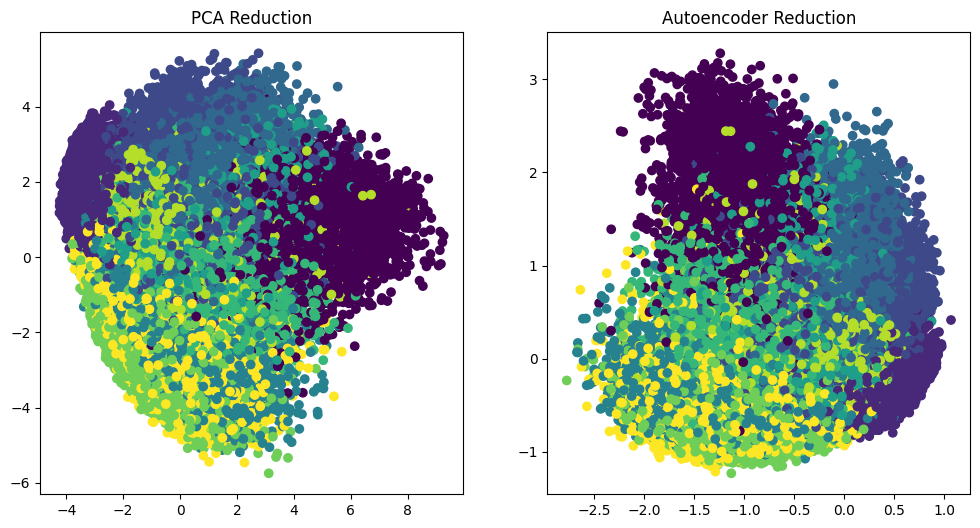

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_train)
plt.title("PCA Reduction")
plt.subplot(1,2,2)
plt.scatter(x_encoded[:,0], x_encoded[:,1], c=y_train)
plt.title("Autoencoder Reduction")
